In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sbc import ThinSBC, rmse_mean, rmse_averaged
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = "20, 10"

In [7]:
N=25
num_reps = 10000
data = dict(N=N, X=np.random.normal(0, 5, N))
with open("../code/gen_lin_regr_c.stan") as f: print(f.read())
with open("../code/lin_regr_c_wide.stan") as f: print(f.read())
sbc = ThinSBC(100, "../code/gen_lin_regr_c.stan", "../code/lin_regr_c_wide.stan",

             dict(chains=1, iter=2000, warmup=1000), stats=[rmse_mean, rmse_averaged])
reps = sbc.run(data, num_reps)
reps.to_csv(str(sbc) + ".csv")

data {
  int<lower=1> N;
  real X[N];
}

generated quantities {
  real beta;
  real alpha;
  real y[N];

  beta = normal_rng(0, 10);
  alpha = normal_rng(0, 10);

  for (n in 1:N)
    y[n] = normal_rng(X[n] * beta + alpha, 1.2);
}

data {
  int<lower=1> N;
  vector[N] X;
  vector[N] y;
}

parameters {
  real beta;
  real alpha;
}

model {
  beta ~ normal(0, 1);
  alpha ~ normal(0, 10);

  y ~ normal(X * beta + alpha, 1.2);
}

Using cached StanModel
Using cached StanModel
Using  24  cores.


/home/sean/vsbc/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Redoing! needed 2063
Redoing! needed 2142
Redoing! needed 2136
Redoing! needed 2047
Redoing! needed 2020
Redoing! needed 2010
Redoing! needed 2212
Redoing! needed 2025
Redoing! needed 2005
Redoing! needed 2282
Redoing! needed 2418
Redoing! needed 2265
Redoing! needed 2025
Redoing! needed 2069
Redoing! needed 2156
Redoing! needed 2010
Redoing! needed 2226
Redoing! needed 2104
Redoing! needed 2104
Redoing! needed 2176
Redoing! needed 2036
Redoing! needed 2069
Redoing! needed 2183
Redoing! needed 2015
run took 239.0561821460724s


In [8]:
reps.head()

,alpha_n_eff,alpha_order_stat,alpha_prior,alpha_rhat,alpha_rmse_averaged,alpha_rmse_mean,beta_n_eff,beta_order_stat,beta_prior,beta_rhat,beta_rmse_averaged,beta_rmse_mean
0,456.0,67,1.282804,1.003078,0.277488,0.123257,440.0,32,-8.305083,1.001802,0.069472,0.031298
1,437.0,42,-5.318037,0.999085,0.268542,0.069781,308.0,27,0.621040,0.999595,0.079372,0.042689
2,437.0,15,-6.989137,0.999165,0.341074,0.223744,320.0,95,-4.110886,0.999654,0.121146,0.105319
3,678.0,33,9.057296,1.000227,0.291647,0.114833,579.0,42,-6.854063,1.006833,0.068017,0.018860
4,503.0,45,11.723939,0.999128,0.273565,0.037714,510.0,26,7.132623,0.999561,0.067634,0.033192


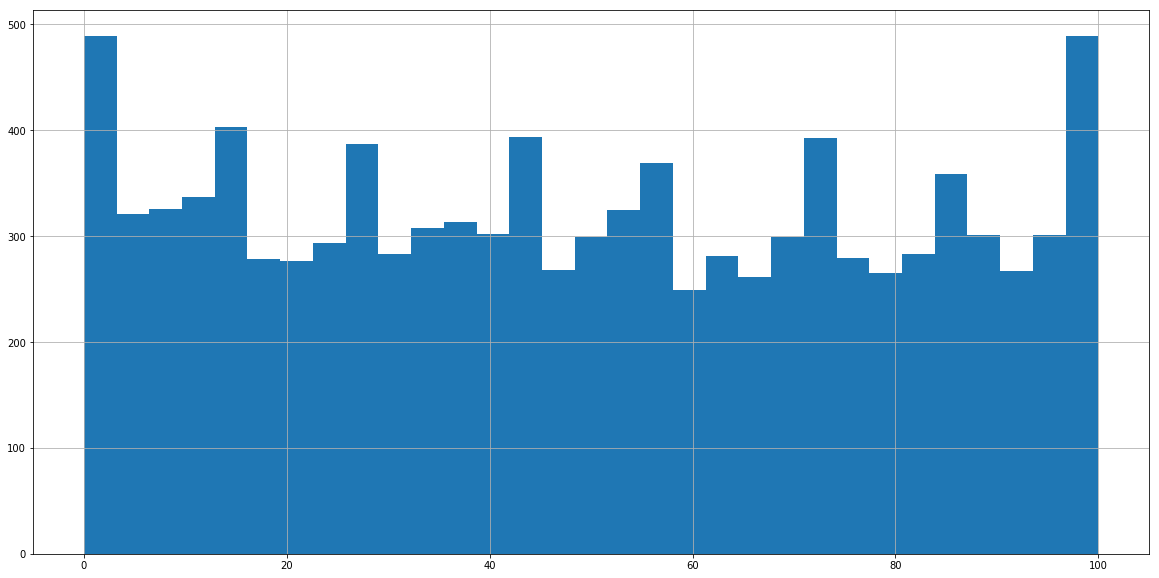

In [14]:
reps["alpha_order_stat"].hist(bins=31)
plt.savefig("wide_alpha.eps")

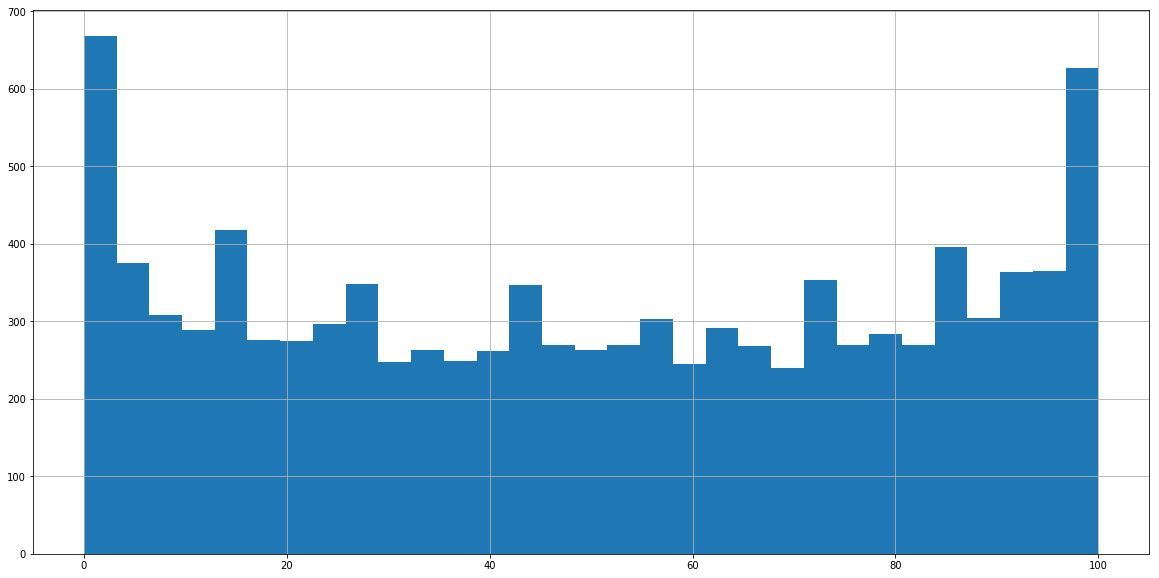

In [13]:
reps["beta_order_stat"].hist(bins=31)
plt.savefig("wide_beta.eps")